In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
import sys
sys.path.append('..')
from dataset import batcher

In [123]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [263]:
# Load model
experiments = ['imagery_sample_cnn_regression']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [264]:
# Get test split
test_batcher = batcher.Batcher(bucket=False, shuffle=False, split='test', repeat=1, batch_size=652).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 3)


In [265]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
            loss=LOSS,
            optimizer=OPT,
            metrics=METRICS,
        )

y_preds = trained_model.predict_on_batch(x_true)
print(y_preds)

2023-01-29 13:31:39.643418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[ -72.82202 ]
 [ -27.688545]
 [ -34.762383]
 [ -63.941025]
 [ -52.615517]
 [ -80.85093 ]
 [ -45.050297]
 [ -40.983433]
 [-171.56682 ]
 [ -33.00806 ]
 [ -54.325256]
 [ -48.590694]
 [ -68.36465 ]
 [ -48.918926]
 [ -88.89273 ]
 [ -50.948563]
 [ -94.51023 ]
 [ -39.324295]
 [-175.36613 ]
 [-120.388824]
 [-189.02571 ]
 [-120.53893 ]
 [ -46.202335]
 [-104.61274 ]
 [ -98.83093 ]
 [ -40.923637]
 [ -44.373108]
 [ -19.21421 ]
 [-168.85297 ]
 [ -58.495014]
 [-155.36794 ]
 [ -59.347054]
 [-115.80898 ]
 [ -82.94397 ]
 [ -41.413   ]
 [ -32.186203]
 [-140.94563 ]
 [ -37.727715]
 [ -56.48161 ]
 [ -29.013222]
 [ -65.80328 ]
 [ -90.85576 ]
 [ -92.73448 ]
 [ -54.520386]
 [ -45.632755]
 [ -55.51999 ]
 [-140.46579 ]
 [ -59.22944 ]
 [ -64.93875 ]
 [ -53.251595]
 [ -51.522064]
 [ -63.464607]
 [-116.815994]
 [ -48.453335]
 [ -66.69333 ]
 [ -20.721909]
 [ -96.23462 ]
 [-199.8777  ]
 [-165.65782 ]
 [ -45.632755]
 [-135.92006 ]
 [-167.43437 ]
 [-184.31007 ]
 [ -56.056015]
 [ -53.77404 ]
 [ -50.17259 ]
 [-189.452

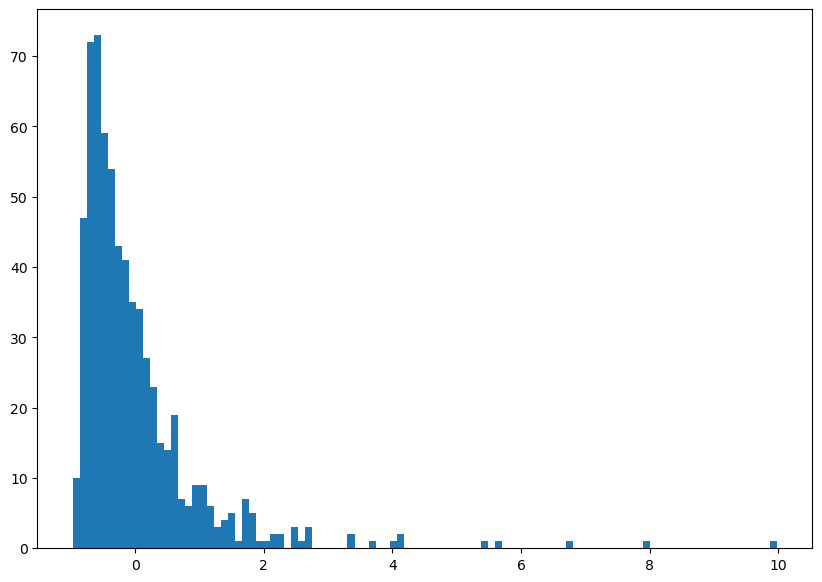

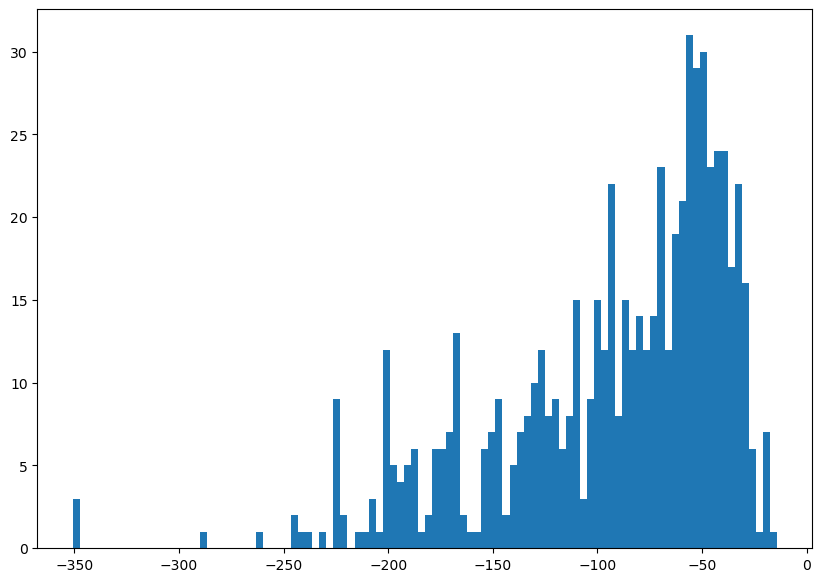

In [266]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()


r2 = pearsonr(y_true, y_preds)[0]

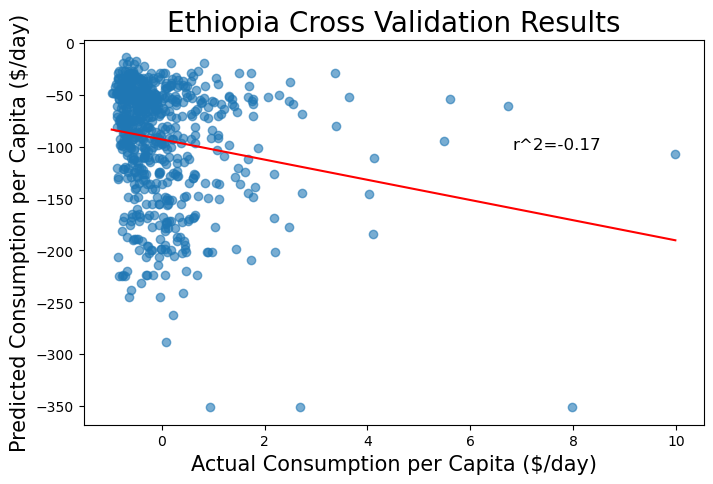

In [278]:
# Plot predictions
country = 'Ethiopia'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
plt.show()